In [4]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

In [5]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from function_notebook_1 import *

In [6]:
df = pd.read_csv('../data/regularseason17.csv').drop('Unnamed: 0', axis = 1)
df.head()

,w_loc,W_TeamID,W_Score,W_FGM,W_FGA,W_FGM3,W_FGA3,W_FTM,W_FTA,W_OR,...,L_Opp_TSpct,L_Opp_FTr,L_Opp_3Pr,L_Opp_TR,L_Opp_ATOr,L_Opp_Ast_%,L_Opp_Stl_%,L_Opp_Blk_%,L_Opp_TO_r,fav_win
0,H,1398.0,78.0,23.0,57.0,7.0,20.0,25.0,38.0,16.0,...,0.485331,0.316667,0.507063,34.0,1.625000,0.565217,0.072727,0.016949,0.103862,True
1,H,1413.0,64.0,20.0,53.0,9.0,28.0,15.0,27.0,6.0,...,0.467153,0.338983,0.394161,47.0,0.642857,0.450000,0.064914,0.033333,0.169697,False
2,H,1113.0,88.0,33.0,67.0,9.0,28.0,13.0,18.0,12.0,...,0.542445,0.344262,0.140895,37.0,2.272727,0.806452,0.104743,0.083333,0.134187,True
3,H,1135.0,55.0,18.0,57.0,10.0,25.0,9.0,14.0,11.0,...,0.602457,0.309091,0.317083,35.0,1.176471,0.689655,0.098220,0.145455,0.212301,False
4,H,1188.0,69.0,25.0,58.0,7.0,17.0,12.0,19.0,12.0,...,0.549055,0.382979,0.234023,34.0,0.578947,0.500000,0.071365,0.066667,0.254863,False


In [7]:
df = pd.get_dummies(df, columns=['w_loc'], drop_first=True)
df

,W_TeamID,W_Score,W_FGM,W_FGA,W_FGM3,W_FGA3,W_FTM,W_FTA,W_OR,W_DR,...,L_Opp_3Pr,L_Opp_TR,L_Opp_ATOr,L_Opp_Ast_%,L_Opp_Stl_%,L_Opp_Blk_%,L_Opp_TO_r,fav_win,w_loc_H,w_loc_N
0,1398.0,78.000000,23.000000,57.000000,7.000000,20.000000,25.000000,38.000000,16.000000,32.000000,...,0.507063,34.000000,1.625000,0.565217,0.072727,0.016949,0.103862,True,1,0
1,1413.0,64.000000,20.000000,53.000000,9.000000,28.000000,15.000000,27.000000,6.000000,26.000000,...,0.394161,47.000000,0.642857,0.450000,0.064914,0.033333,0.169697,False,1,0
2,1113.0,88.000000,33.000000,67.000000,9.000000,28.000000,13.000000,18.000000,12.000000,35.000000,...,0.140895,37.000000,2.272727,0.806452,0.104743,0.083333,0.134187,True,1,0
3,1135.0,55.000000,18.000000,57.000000,10.000000,25.000000,9.000000,14.000000,11.000000,12.000000,...,0.317083,35.000000,1.176471,0.689655,0.098220,0.145455,0.212301,False,1,0
4,1188.0,69.000000,25.000000,58.000000,7.000000,17.000000,12.000000,19.000000,12.000000,19.000000,...,0.234023,34.000000,0.578947,0.500000,0.071365,0.066667,0.254863,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,1276.0,74.911765,26.264706,54.617647,9.352941,24.617647,13.029412,16.823529,7.647059,21.882353,...,0.293235,31.212121,0.762125,0.456432,0.068083,0.053758,0.177341,False,0,1
5180,1343.0,70.814815,25.296296,56.703704,9.851852,25.962963,10.370370,14.074074,8.074074,24.407407,...,0.340855,33.111111,1.128125,0.516452,0.085103,0.066710,0.149196,True,0,1
5181,1348.0,73.468750,26.125000,57.718750,6.218750,18.406250,15.000000,22.906250,11.968750,25.500000,...,0.261798,33.696970,0.703854,0.462051,0.068887,0.061522,0.187306,False,0,1
5182,1374.0,74.636364,26.181818,55.363636,8.090909,20.090909,14.181818,20.393939,12.090909,26.393939,...,0.322491,32.636364,0.788210,0.523948,0.045155,0.050639,0.181741,True,0,1


In [8]:
#train_test_split
X = df.drop('fav_win',axis=1)
y = df['fav_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((4147, 108), (1037, 108))

In [9]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Logistic Regression

In [12]:
log_feat=feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)
X_train_best_log = X_train_scaled[log_feat]
X_test_best_log = X_test_scaled[log_feat]

Penalty: l2
Solver: newton-cg
Mean Cross-Val Score: 0.8478486200531924
Train Mean Accuracy: 0.8536291294911984
Test Mean Accuracy: 0.8601735776277725
Recall Score: 0.9434954007884363
Precision Score: 0.875609756097561
F1 Score: 0.9082858950031626


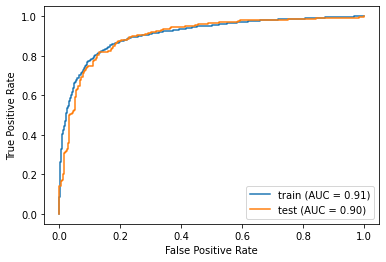

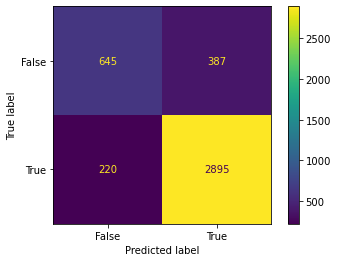

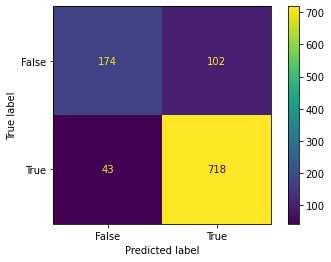

In [13]:
log_reg_prob=logreg(X_train_best_log, X_test_best_log, y_train, y_test)

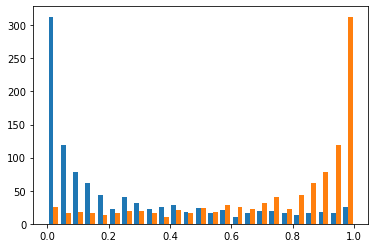

In [19]:
plt.hist(log_reg_prob,bins=25,label='fav');

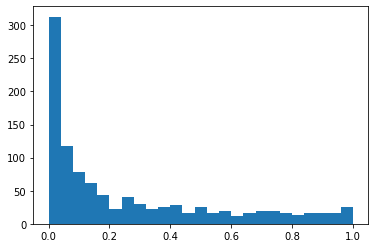

In [26]:
plt.hist(log_reg_prob[:,0],bins=25);

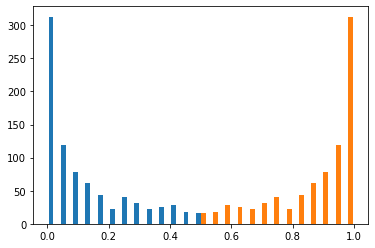

In [45]:
plt.hist(log_reg_prob[log_reg_prob[:,1]>.5],bins=25);

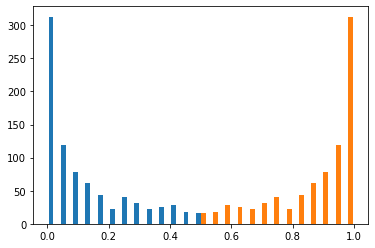

In [46]:
plt.hist(log_reg_prob[log_reg_prob[:,0]<.5],bins=25);

In [49]:
dog_win = log_reg_prob[:,0]
fav_win = log_reg_prob[:,1]

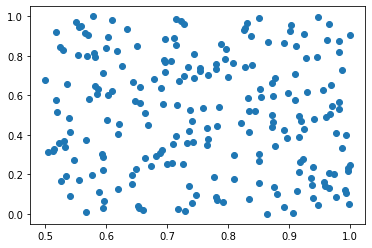

In [61]:
y=np.linspace(0,1,len(dog_win[dog_win>.5]))
plt.scatter(dog_win[dog_win>.5],y);

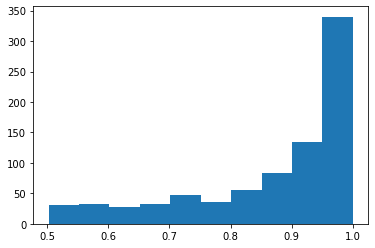

In [56]:
plt.hist(fav_win[fav_win>.5]);

### KNN

In [ ]:
knn(X_train_scaled, X_test_scaled, y_train, y_test)

### Decision Tree

In [ ]:
dtree_feats=feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)

In [ ]:
X_train_best_dtree=X_train[dtree_feats]
X_test_best_dtree=X_test[dtree_feats]

In [ ]:
dtree(X_train_best_dtree, X_test_best_dtree, y_train, y_test)

### Random Forest

In [ ]:
random_forest_feat=feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_rforest=X_train_scaled[random_forest_feat]
X_test_best_rforest=X_test_scaled[random_forest_feat]

In [ ]:
random_forest(X_train, X_test, y_train, y_test, cv=5)

### Bagging Classifier

In [ ]:
bagged(X_train, X_test, y_train, y_test, cv=5)

### XGboost

In [ ]:
xgboost(X_train, X_test, y_train, y_test, cv=5)